In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cleaning the Data

### Loading the whole csv into dataframe

In [3]:
df = pd.read_csv(r'C:\Users\saikr\OneDrive\Desktop\Innobyte Intern\Amazon Sale Report.csv', encoding_errors='ignore')
df.head()

index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel ship-service-level  Category Size Courier Status  \
0   Merchant     Amazon.in           Standard   T-shirt    S     On the Way   
1   Merchant     Amazon.in           Standard     Shirt  3XL        Shipped   
2     Amazon     Amazon.in          Expedited     Shirt   XL        Shipped   
3   Merchant     Amazon.in           Standard   Blazzer    L     On the Way   
4     Amazon     Amazon.in          Expedited  Trousers  3XL        Shipped   

   ...  currency  Amount    ship-city   ship-state ship-postal-code  \
0  ...       INR  647.62       MUMBAI  MAHARASHTRA         400081.0   
1  ...       INR  406.00    BENGALURU    KARNATAKA         560085.0   
2  ...       INR  329.00  NAVI MUMBAI  MAHARASHTRA         410210.0   
3  ...       INR  753.33   PUDUCHERRY   PUDUCHERRY         605008.0   
4  ...       INR  574.00      CHENNAI   TAMIL NADU         600073.0   

   ship-country    B2B  fulfilled-by New  PendingS  
0            IN  False     Easy Ship NaN       NaN  
1            IN  False     Easy Ship NaN       NaN  
2            IN   True           NaN NaN       NaN  
3            IN  False     Easy Ship NaN       NaN  
4            IN  False           NaN NaN       NaN  

[5 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128939 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [5]:
df.describe()

index            Qty         Amount  ship-postal-code  New  \
count  128976.000000  128976.000000  121176.000000     128941.000000  0.0   
mean    64486.130427       0.904401     648.562176     463945.677744  NaN   
std     37232.897832       0.313368     281.185041     191458.488954  NaN   
min         0.000000       0.000000       0.000000     110001.000000  NaN   
25%     32242.750000       1.000000     449.000000     382421.000000  NaN   
50%     64486.500000       1.000000     605.000000     500033.000000  NaN   
75%     96730.250000       1.000000     788.000000     600024.000000  NaN   
max    128974.000000      15.000000    5584.000000     989898.000000  NaN   

       PendingS  
count       0.0  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN

In [6]:
df.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 37
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

In [7]:
len(df.index)

128976

In [8]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')

In [9]:
# remove unnecessaary columns
df.drop(['New', 'PendingS'],axis = 1, inplace = True)
df.head()

index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel ship-service-level  Category Size Courier Status  \
0   Merchant     Amazon.in           Standard   T-shirt    S     On the Way   
1   Merchant     Amazon.in           Standard     Shirt  3XL        Shipped   
2     Amazon     Amazon.in          Expedited     Shirt   XL        Shipped   
3   Merchant     Amazon.in           Standard   Blazzer    L     On the Way   
4     Amazon     Amazon.in          Expedited  Trousers  3XL        Shipped   

   Qty currency  Amount    ship-city   ship-state  ship-postal-code  \
0    0      INR  647.62       MUMBAI  MAHARASHTRA          400081.0   
1    1      INR  406.00    BENGALURU    KARNATAKA          560085.0   
2    1      INR  329.00  NAVI MUMBAI  MAHARASHTRA          410210.0   
3    0      INR  753.33   PUDUCHERRY   PUDUCHERRY          605008.0   
4    1      INR  574.00      CHENNAI   TAMIL NADU          600073.0   

  ship-country    B2B fulfilled-by  
0           IN  False    Easy Ship  
1           IN  False    Easy Ship  
2           IN   True          NaN  
3           IN  False    Easy Ship  
4           IN  False          NaN

In [10]:
# filling null value as 'others'
df['fulfilled-by'] = df['fulfilled-by'].fillna('Amazon')

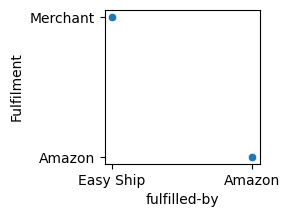

In [11]:
# checking the correlation of two variables since we filled null values based on fulfilment
plt.figure(figsize = (2,2))
sns.scatterplot(data = df, x = 'fulfilled-by',y = 'Fulfilment')
plt.show()

In [12]:
df.describe()

index            Qty         Amount  ship-postal-code
count  128976.000000  128976.000000  121176.000000     128941.000000
mean    64486.130427       0.904401     648.562176     463945.677744
std     37232.897832       0.313368     281.185041     191458.488954
min         0.000000       0.000000       0.000000     110001.000000
25%     32242.750000       1.000000     449.000000     382421.000000
50%     64486.500000       1.000000     605.000000     500033.000000
75%     96730.250000       1.000000     788.000000     600024.000000
max    128974.000000      15.000000    5584.000000     989898.000000

In [13]:
df.isnull().sum()

index                    0
Order ID                 0
Date                     0
Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
Category                 0
Size                     0
Courier Status           0
Qty                      0
currency              7800
Amount                7800
ship-city               37
ship-state              35
ship-postal-code        35
ship-country            35
B2B                      0
fulfilled-by             0
dtype: int64

In [14]:
# deleting the rows which contains null values
df.dropna(inplace = True)

In [15]:
len(df.index)

121141

In [16]:
df.drop(['index'],axis =1, inplace = True)

In [17]:
df.head()

Order ID      Date                        Status Fulfilment  \
0  405-8078784-5731545  04-30-22                     Cancelled   Merchant   
1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   Merchant   
2  404-0687676-7273146  04-30-22                       Shipped     Amazon   
3  403-9615377-8133951  04-30-22                     Cancelled   Merchant   
4  407-1069790-7240320  04-30-22                       Shipped     Amazon   

  Sales Channel ship-service-level  Category Size Courier Status  Qty  \
0     Amazon.in           Standard   T-shirt    S     On the Way    0   
1     Amazon.in           Standard     Shirt  3XL        Shipped    1   
2     Amazon.in          Expedited     Shirt   XL        Shipped    1   
3     Amazon.in           Standard   Blazzer    L     On the Way    0   
4     Amazon.in          Expedited  Trousers  3XL        Shipped    1   

  currency  Amount    ship-city   ship-state  ship-postal-code ship-country  \
0      INR  647.62       MUMBAI  MAHARASHTRA          400081.0           IN   
1      INR  406.00    BENGALURU    KARNATAKA          560085.0           IN   
2      INR  329.00  NAVI MUMBAI  MAHARASHTRA          410210.0           IN   
3      INR  753.33   PUDUCHERRY   PUDUCHERRY          605008.0           IN   
4      INR  574.00      CHENNAI   TAMIL NADU          600073.0           IN   

     B2B fulfilled-by  
0  False    Easy Ship  
1  False    Easy Ship  
2   True       Amazon  
3  False    Easy Ship  
4  False       Amazon

In [18]:
df['Date'] = pd.to_datetime(df["Date"])

In [19]:
df.dtypes

Order ID                      object
Date                  datetime64[ns]
Status                        object
Fulfilment                    object
Sales Channel                 object
ship-service-level            object
Category                      object
Size                          object
Courier Status                object
Qty                            int64
currency                      object
Amount                       float64
ship-city                     object
ship-state                    object
ship-postal-code             float64
ship-country                  object
B2B                             bool
fulfilled-by                  object
dtype: object

In [20]:
df.describe()

Qty         Amount  ship-postal-code
count  121141.000000  121141.000000     121141.000000
mean        0.961252     648.571047     463627.647568
std         0.214277     281.194041     191300.730807
min         0.000000       0.000000     110001.000000
25%         1.000000     449.000000     382421.000000
50%         1.000000     605.000000     500032.000000
75%         1.000000     788.000000     600020.000000
max         8.000000    5584.000000     989898.000000

In [21]:
# checking the all distinct values in 'ship-state' column
print(df['ship-state'].unique())
len(df['ship-state'].unique())

['MAHARASHTRA' 'KARNATAKA' 'PUDUCHERRY' 'TAMIL NADU' 'UTTAR PRADESH'
 'CHANDIGARH' 'TELANGANA' 'ANDHRA PRADESH' 'RAJASTHAN' 'DELHI' 'HARYANA'
 'ASSAM' 'JHARKHAND' 'CHHATTISGARH' 'ODISHA' 'KERALA' 'MADHYA PRADESH'
 'WEST BENGAL' 'NAGALAND' 'Gujarat' 'UTTARAKHAND' 'BIHAR'
 'JAMMU & KASHMIR' 'PUNJAB' 'HIMACHAL PRADESH' 'ARUNACHAL PRADESH' 'Goa'
 'MEGHALAYA' 'GOA' 'MANIPUR' 'TRIPURA' 'LADAKH' 'DADRA AND NAGAR' 'SIKKIM'
 'Delhi' 'ANDAMAN & NICOBAR' 'Punjab' 'Rajshthan' 'Manipur' 'rajasthan'
 'Odisha' 'NL' 'Bihar' 'MIZORAM' 'punjab' 'New Delhi' 'Rajasthan'
 'Punjab/Mohali/Zirakpur' 'Puducherry' 'delhi' 'RJ' 'Chandigarh' 'orissa'
 'LAKSHADWEEP' 'goa' 'PB' 'Arunachal Pradesh' 'AR' 'Pondicherry' 'Sikkim'
 'Arunachal pradesh' 'Nagaland' 'bihar' 'Mizoram' 'rajsthan' 'Orissa'
 'Rajsthan' 'Meghalaya']


68

In [22]:
df['ship-state'] = df['ship-state'].str.upper()
print(df['ship-state'].unique())
len(df['ship-state'].unique())

['MAHARASHTRA' 'KARNATAKA' 'PUDUCHERRY' 'TAMIL NADU' 'UTTAR PRADESH'
 'CHANDIGARH' 'TELANGANA' 'ANDHRA PRADESH' 'RAJASTHAN' 'DELHI' 'HARYANA'
 'ASSAM' 'JHARKHAND' 'CHHATTISGARH' 'ODISHA' 'KERALA' 'MADHYA PRADESH'
 'WEST BENGAL' 'NAGALAND' 'GUJARAT' 'UTTARAKHAND' 'BIHAR'
 'JAMMU & KASHMIR' 'PUNJAB' 'HIMACHAL PRADESH' 'ARUNACHAL PRADESH' 'GOA'
 'MEGHALAYA' 'MANIPUR' 'TRIPURA' 'LADAKH' 'DADRA AND NAGAR' 'SIKKIM'
 'ANDAMAN & NICOBAR' 'RAJSHTHAN' 'NL' 'MIZORAM' 'NEW DELHI'
 'PUNJAB/MOHALI/ZIRAKPUR' 'RJ' 'ORISSA' 'LAKSHADWEEP' 'PB' 'AR'
 'PONDICHERRY' 'RAJSTHAN']


46

In [23]:
df['ship-state'] = df['ship-state'].replace('AR','ARUNACHAL PRADESH')
df['ship-state'] = df['ship-state'].replace('PB','PUNJAB')
df['ship-state'] = df['ship-state'].replace('RJ','RAJASTHAN')
df['ship-state'] = df['ship-state'].replace('ORISSA','ODISHA')
df['ship-state'] = df['ship-state'].replace('RAJSTHAN','RAJASTHAN')
df['ship-state'] = df['ship-state'].replace('PUNJAB/MOHALI/ZIRAKPUR','PUNJAB')
df['ship-state'] = df['ship-state'].replace('PUDUCHERRY','PONDICHERRY')
df['ship-state'] = df['ship-state'].replace('RAJSHTHAN','RAJASTHAN')
df['ship-state'] = df['ship-state'].replace('NL','NAGALAND')

In [24]:
print(df['ship-state'].unique())
len(df['ship-state'].unique())

['MAHARASHTRA' 'KARNATAKA' 'PONDICHERRY' 'TAMIL NADU' 'UTTAR PRADESH'
 'CHANDIGARH' 'TELANGANA' 'ANDHRA PRADESH' 'RAJASTHAN' 'DELHI' 'HARYANA'
 'ASSAM' 'JHARKHAND' 'CHHATTISGARH' 'ODISHA' 'KERALA' 'MADHYA PRADESH'
 'WEST BENGAL' 'NAGALAND' 'GUJARAT' 'UTTARAKHAND' 'BIHAR'
 'JAMMU & KASHMIR' 'PUNJAB' 'HIMACHAL PRADESH' 'ARUNACHAL PRADESH' 'GOA'
 'MEGHALAYA' 'MANIPUR' 'TRIPURA' 'LADAKH' 'DADRA AND NAGAR' 'SIKKIM'
 'ANDAMAN & NICOBAR' 'MIZORAM' 'NEW DELHI' 'LAKSHADWEEP']


37

In [25]:
df['ship-state'] = df['ship-state'].str.capitalize()

In [26]:
print(df['ship-state'].unique())

['Maharashtra' 'Karnataka' 'Pondicherry' 'Tamil nadu' 'Uttar pradesh'
 'Chandigarh' 'Telangana' 'Andhra pradesh' 'Rajasthan' 'Delhi' 'Haryana'
 'Assam' 'Jharkhand' 'Chhattisgarh' 'Odisha' 'Kerala' 'Madhya pradesh'
 'West bengal' 'Nagaland' 'Gujarat' 'Uttarakhand' 'Bihar'
 'Jammu & kashmir' 'Punjab' 'Himachal pradesh' 'Arunachal pradesh' 'Goa'
 'Meghalaya' 'Manipur' 'Tripura' 'Ladakh' 'Dadra and nagar' 'Sikkim'
 'Andaman & nicobar' 'Mizoram' 'New delhi' 'Lakshadweep']


In [27]:
df['ship-city'] = df['ship-city'].str.capitalize()

In [28]:
df.head()

Order ID       Date                        Status Fulfilment  \
0  405-8078784-5731545 2022-04-30                     Cancelled   Merchant   
1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   Merchant   
2  404-0687676-7273146 2022-04-30                       Shipped     Amazon   
3  403-9615377-8133951 2022-04-30                     Cancelled   Merchant   
4  407-1069790-7240320 2022-04-30                       Shipped     Amazon   

  Sales Channel ship-service-level  Category Size Courier Status  Qty  \
0     Amazon.in           Standard   T-shirt    S     On the Way    0   
1     Amazon.in           Standard     Shirt  3XL        Shipped    1   
2     Amazon.in          Expedited     Shirt   XL        Shipped    1   
3     Amazon.in           Standard   Blazzer    L     On the Way    0   
4     Amazon.in          Expedited  Trousers  3XL        Shipped    1   

  currency  Amount    ship-city   ship-state  ship-postal-code ship-country  \
0      INR  647.62       Mumbai  Maharashtra          400081.0           IN   
1      INR  406.00    Bengaluru    Karnataka          560085.0           IN   
2      INR  329.00  Navi mumbai  Maharashtra          410210.0           IN   
3      INR  753.33   Puducherry  Pondicherry          605008.0           IN   
4      INR  574.00      Chennai   Tamil nadu          600073.0           IN   

     B2B fulfilled-by  
0  False    Easy Ship  
1  False    Easy Ship  
2   True       Amazon  
3  False    Easy Ship  
4  False       Amazon

In [29]:
# check the count of distinct values of each column
for i in df.columns:
    print(i,df[i].nunique())

Order ID 112859
Date 91
Status 12
Fulfilment 2
Sales Channel 1
ship-service-level 2
Category 9
Size 11
Courier Status 3
Qty 7
currency 1
Amount 1408
ship-city 7091
ship-state 37
ship-postal-code 9268
ship-country 1
B2B 2
fulfilled-by 2


In [30]:
# removing the columns which have same value for whole column
df.drop(['Sales Channel','currency','ship-country'], axis = 1, inplace = True)
print(len(df.index))
df.head()

121141


Order ID       Date                        Status Fulfilment  \
0  405-8078784-5731545 2022-04-30                     Cancelled   Merchant   
1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   Merchant   
2  404-0687676-7273146 2022-04-30                       Shipped     Amazon   
3  403-9615377-8133951 2022-04-30                     Cancelled   Merchant   
4  407-1069790-7240320 2022-04-30                       Shipped     Amazon   

  ship-service-level  Category Size Courier Status  Qty  Amount    ship-city  \
0           Standard   T-shirt    S     On the Way    0  647.62       Mumbai   
1           Standard     Shirt  3XL        Shipped    1  406.00    Bengaluru   
2          Expedited     Shirt   XL        Shipped    1  329.00  Navi mumbai   
3           Standard   Blazzer    L     On the Way    0  753.33   Puducherry   
4          Expedited  Trousers  3XL        Shipped    1  574.00      Chennai   

    ship-state  ship-postal-code    B2B fulfilled-by  
0  Maharashtra          400081.0  False    Easy Ship  
1    Karnataka          560085.0  False    Easy Ship  
2  Maharashtra          410210.0   True       Amazon  
3  Pondicherry          605008.0  False    Easy Ship  
4   Tamil nadu          600073.0  False       Amazon

In [32]:
df = df[df['Amount'] != 0]
df.head()

Order ID       Date                        Status Fulfilment  \
0  405-8078784-5731545 2022-04-30                     Cancelled   Merchant   
1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   Merchant   
2  404-0687676-7273146 2022-04-30                       Shipped     Amazon   
3  403-9615377-8133951 2022-04-30                     Cancelled   Merchant   
4  407-1069790-7240320 2022-04-30                       Shipped     Amazon   

  ship-service-level  Category Size Courier Status  Qty  Amount    ship-city  \
0           Standard   T-shirt    S     On the Way    0  647.62       Mumbai   
1           Standard     Shirt  3XL        Shipped    1  406.00    Bengaluru   
2          Expedited     Shirt   XL        Shipped    1  329.00  Navi mumbai   
3           Standard   Blazzer    L     On the Way    0  753.33   Puducherry   
4          Expedited  Trousers  3XL        Shipped    1  574.00      Chennai   

    ship-state  ship-postal-code    B2B fulfilled-by  
0  Maharashtra          400081.0  False    Easy Ship  
1    Karnataka          560085.0  False    Easy Ship  
2  Maharashtra          410210.0   True       Amazon  
3  Pondicherry          605008.0  False    Easy Ship  
4   Tamil nadu          600073.0  False       Amazon

In [33]:
df['Type of Deal'] = ['Business to Business' if x == True else 'Business to Customer' if x == False else 'Other' for x in df['B2B']]

In [34]:
df.head()

Order ID       Date                        Status Fulfilment  \
0  405-8078784-5731545 2022-04-30                     Cancelled   Merchant   
1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   Merchant   
2  404-0687676-7273146 2022-04-30                       Shipped     Amazon   
3  403-9615377-8133951 2022-04-30                     Cancelled   Merchant   
4  407-1069790-7240320 2022-04-30                       Shipped     Amazon   

  ship-service-level  Category Size Courier Status  Qty  Amount    ship-city  \
0           Standard   T-shirt    S     On the Way    0  647.62       Mumbai   
1           Standard     Shirt  3XL        Shipped    1  406.00    Bengaluru   
2          Expedited     Shirt   XL        Shipped    1  329.00  Navi mumbai   
3           Standard   Blazzer    L     On the Way    0  753.33   Puducherry   
4          Expedited  Trousers  3XL        Shipped    1  574.00      Chennai   

    ship-state  ship-postal-code    B2B fulfilled-by          Type of Deal  
0  Maharashtra          400081.0  False    Easy Ship  Business to Customer  
1    Karnataka          560085.0  False    Easy Ship  Business to Customer  
2  Maharashtra          410210.0   True       Amazon  Business to Business  
3  Pondicherry          605008.0  False    Easy Ship  Business to Customer  
4   Tamil nadu          600073.0  False       Amazon  Business to Customer

In [35]:
len(df.index)

118798

In [36]:
# exporting the cleaned dataframe to csv for creating dashboards in PowerBI 
df.to_csv('cleaned_data.csv', index=False)

In [37]:
categories = df.groupby('Category')['Amount'].agg(['sum','mean','max','min','std'])
categories.reset_index(inplace = True)
categories

Category          sum        mean      max     min         std
0   Blazzer  11214369.12  774.954676  2860.00  359.04  138.408457
1   Perfume    789419.66  745.438772  1449.00  344.76  236.063293
2     Shirt  21289304.08  464.466884  2796.00  199.00  136.378533
3     Shoes    124752.76  804.856516  2058.00  527.62  192.351400
4     Socks    150757.50  369.503676  1028.58  218.10  100.750873
5   T-shirt  39195805.65  851.638398  5584.00  357.00  268.957943
6  Trousers   5344813.30  535.391496  1797.00  246.67  133.054462
7    Wallet    458408.18  533.653295  1266.66  229.00  156.068340
8     Watch       915.00  305.000000   305.00  305.00    0.000000

In [38]:
quantities = df.groupby('Category')['Qty'].agg(['sum','mean','max','min','std'])
quantities.reset_index(inplace = True)
quantities

Category    sum      mean  max  min       std
0   Blazzer  13707  0.947205    4    0  0.239162
1   Perfume   1019  0.962229    2    0  0.205062
2     Shirt  44095  0.962017    5    0  0.217027
3     Shoes    152  0.980645    3    0  0.289894
4     Socks    386  0.946078    2    0  0.266074
5   T-shirt  44203  0.960434    8    0  0.213455
6  Trousers   9717  0.973355    3    0  0.182074
7    Wallet    822  0.956927    3    0  0.249490
8     Watch      3  1.000000    1    1  0.000000

In [39]:
fulfilment_orders = df.groupby('Fulfilment')[['Order ID']].count()
fulfilment_orders.reset_index(inplace = True)
fulfilment_orders


Fulfilment  Order ID
0     Amazon     82101
1   Merchant     36697